In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats 
import numpy as np

In [2]:
#Get csv with pandas 

df = pd.read_csv('Data_Entry_2017.csv')

In [3]:
#showcase df

df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [4]:
#Descriptive stats 

print(df['Patient Age'].describe())

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64


In [5]:
#Get count of the different ages in the dataset 

print(df['Patient Age'].value_counts(ascending=True, dropna=False))

150       1
149       1
154       1
414       1
152       1
       ... 
57     2771
55     2830
52     2891
56     2916
58     3209
Name: Patient Age, Length: 107, dtype: int64


In [6]:
# Get index of the images of patients that have an age above 100

List_Above100 = df.index[df['Patient Age']>100].tolist()

print(List_Above100)

[20852, 46965, 48284, 55742, 58650, 62929, 74884, 78795, 84810, 85404, 86264, 91369, 95794, 98495, 101194, 104590]


In [7]:
#Showcase findings 

print(df.loc[List_Above100])

             Image Index           Finding Labels  Follow-up #  Patient ID  \
20852   00005567_000.png       Effusion|Pneumonia            0        5567   
46965   00011973_002.png                    Edema            2       11973   
48284   00012238_010.png               No Finding           10       12238   
55742   00013950_000.png               No Finding            0       13950   
58650   00014520_026.png        Infiltration|Mass           26       14520   
62929   00015558_000.png               No Finding            0       15558   
74884   00018366_044.png             Pneumothorax           44       18366   
78795   00019346_000.png             Infiltration            0       19346   
84810   00020900_002.png               No Finding            2       20900   
85404   00021047_002.png  Mass|Pleural_Thickening            2       21047   
86264   00021275_003.png               No Finding            3       21275   
91369   00022811_000.png               No Finding            0  

In [8]:
#get count by group range

print(df['Patient Age'].value_counts(bins=5))

(0.586, 83.6]     111730
(83.6, 166.2]        384
(331.4, 414.0]         6
(166.2, 248.8]         0
(248.8, 331.4]         0
Name: Patient Age, dtype: int64


In [9]:
#remove the rows that have age abobve 100 years old

df = df.drop(List_Above100)

In [10]:
#showcase findings 

df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


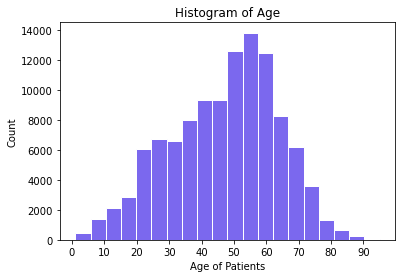

In [11]:
#Plot count of age of our data



plt.hist(df['Patient Age'] ,
         histtype='bar',bins = 20, color='mediumslateblue',
         edgecolor='white')
plticker.MultipleLocator(base=1)





plt.gca().xaxis.set_ticks(np.arange(0, 100, 10))


plt.title("Histogram of Age")
plt.xlabel('Age of Patients')
plt.ylabel('Count')



plt.show()




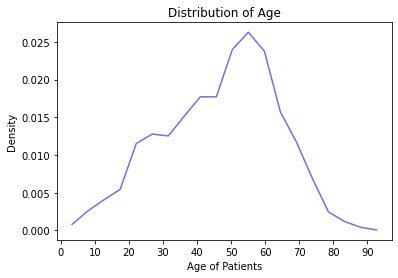

In [12]:
#Plot the distribution of the ages 


value, bins = np.histogram(df['Patient Age'].to_list(), bins=20, density= True)
mean_bins = [(bins[i] + bins[i+1])/2. for i in range(len(bins)-1)]
plt.gca().xaxis.set_ticks(np.arange(0, 100, 10))

plt.title("Distribution of Age")
plt.xlabel('Age of Patients')
plt.ylabel('Density')


plt.plot(mean_bins, value, color='mediumslateblue')

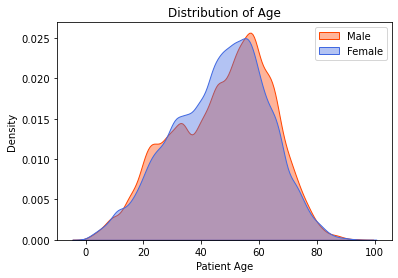

In [13]:
#Distribution of age by gender type



M = df[df["Patient Gender"]=="M"]
F = df[df["Patient Gender"]=="F"]

X1 = M["Patient Age"].dropna()
X2 = F["Patient Age"].dropna()
L1=sns.kdeplot(X1, shade=True, label="Male", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Female",color='royalblue', alpha=0.4)



plt.title("Distribution of Age")

plt.legend()
plt.show()


In [14]:
#get count of how many unique illnesses in the data set


print(df['Finding Labels'].value_counts(ascending=True, dropna=False))

Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax                  1
Cardiomegaly|Infiltration|Nodule|Pneumothorax                                   1
Cardiomegaly|Consolidation|Effusion|Mass|Nodule|Pleural_Thickening              1
Cardiomegaly|Consolidation|Edema|Effusion|Mass|Nodule|Pleural_Thickening        1
Edema|Nodule|Pneumothorax                                                       1
                                                                            ...  
Nodule                                                                       2705
Effusion                                                                     3955
Atelectasis                                                                  4214
Infiltration                                                                 9546
No Finding                                                                  60353
Name: Finding Labels, Length: 836, dtype: int64


In [15]:
#some of the values are recorded as a combination of multiple types, we need to break them to show the true count



Label_list = []

for row in df['Finding Labels']:
    Label_list.append(row.split('|'))
    
#break list within list 
Label_list = [item for c_list in Label_list for item in c_list]  
    
num_values = len(set(Label_list))
print('The amount of records are:', len(Label_list))
print('Unique values are:', num_values)


The amount of records are: 141517
Unique values are: 15


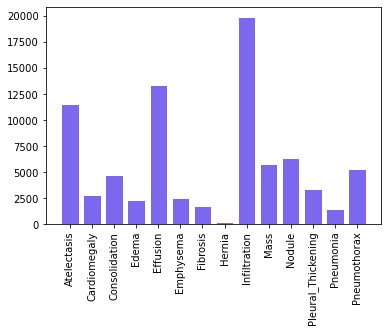

In [16]:
#plot a bar chart to show the comparison 
# To better showcase the count of the illnesses we need to remove the No findings
# this is because they are the one with the highest count and make it hardert to understand the other types


new_list = []

for item in Label_list:
    
    if item == 'No Finding':
        
        continue
    
    new_list.append(item)

#plotting bar graph 

values, counts = np.unique(new_list, return_counts=True)

plt.bar(values, counts, color='mediumslateblue',edgecolor='white')
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.show()


    

In [17]:
# Now we need to get the count of the unique illnesses by gender type

df_male = df[df['Patient Gender']=='M']
df_female = df[df['Patient Gender']=='F']

In [18]:
# certain patients in the data set had more than one illnesses, we need to separete them to get the specific count by type
#We will break them and insert them in two empty lists

Unique_Sick_Males = []
Unique_Sick_Females = []

for row in df_male['Finding Labels']:
    Unique_Sick_Males .append(row.split('|'))

for row in df_female['Finding Labels']:
    Unique_Sick_Females .append(row.split('|'))
    
#break list withi lists
    
Unique_Sick_Males = [item for c_list in Unique_Sick_Males for item in c_list] 
Unique_Sick_Females = [item for c_list in Unique_Sick_Females for item in c_list] 

print(Unique_Sick_Males)

['Cardiomegaly', 'Cardiomegaly', 'Emphysema', 'Cardiomegaly', 'Effusion', 'No Finding', 'Mass', 'Nodule', 'No Finding', 'No Finding', 'Emphysema', 'Effusion', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'Infiltration', 'Atelectasis', 'Infiltration', 'No Finding', 'Effusion', 'Mass', 'No Finding', 'Emphysema', 'Pneumothorax', 'Emphysema', 'Pneumothorax', 'Pleural_Thickening', 'Effusion', 'Emphysema', 'Infiltration', 'Pneumothorax', 'Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax', 'Effusion', 'Infiltration', 'Infiltration', 'No Finding', 'Pleural_Thickening', 'Effusion', 'Pneumonia', 'Pneumothorax', 'Pneumothorax', 'Pneumothorax', 'Pneumothorax', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'Effusion', 'Infiltration', 'Pneumothorax', 'No Finding', 'Pneumothorax', 'Effusion', 'Infiltration', 'Mass', 'Infiltration', 'Mass', 'Pneumothorax', 'Mass', 'Cardiomegaly', 'Infiltration', 'Mass', 'Nodule', 'Cardiomegaly', 'Emphysema', 'Cardiomegaly', 'Effusio

In [19]:
print(Unique_Sick_Females)

['Hernia', 'Hernia', 'Hernia', 'Hernia', 'Infiltration', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'Infiltration', 'Effusion', 'Infiltration', 'Cardiomegaly', 'No Finding', 'Nodule', 'Infiltration', 'No Finding', 'No Finding', 'No Finding', 'Effusion', 'Infiltration', 'No Finding', 'Infiltration', 'Mass', 'Nodule', 'No Finding', 'No Finding', 'Cardiomegaly', 'Cardiomegaly', 'Edema', 'Effusion', 'No Finding', 'No Finding', 'Cardiomegaly', 'Edema', 'Effusion', 'No Finding', 'Atelectasis', 'Effusion', 'Infiltration', 'Cardiomegaly', 'Edema', 'Effusion', 'No Finding', 'No Finding', 'No Finding', 'Infiltration', 'Atelectasis', 'Consolidation', 'Edema', 'Pneumonia', 'Infiltration', 'Infiltration', 'Infiltration', 'Consolidation', 'Infiltration', 'Infiltration', 'No Finding', 'No Finding', 'Cardiomegaly', 'No Finding', 'Edema', 'Infiltration', 'Edema', 'No Finding', 'Infiltration', 'Cardiomegaly', 'Consolidation

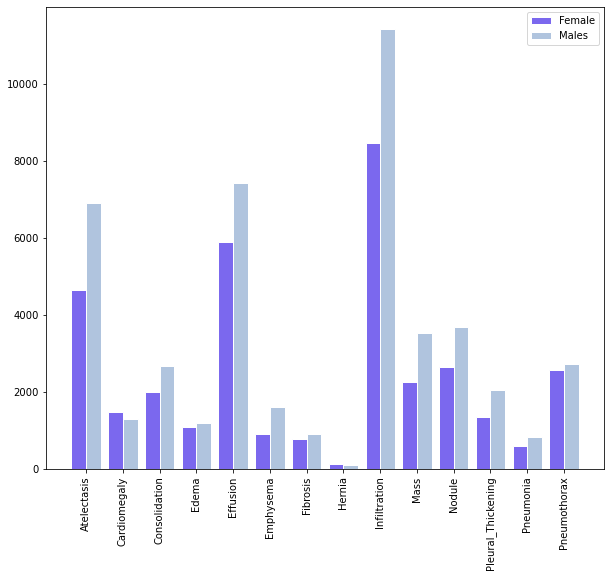

In [20]:
# To better showcase the count of the illnesses we need to remove the No findings
# this is because they are the one with the highest count and make it hardert to understand the other types

new_list_Males = []
new_list_Females = []

for item in Unique_Sick_Females:
    if item == 'No Finding':
        continue
    new_list_Females.append(item)

for item in Unique_Sick_Males:
    if item == 'No Finding': 
        continue
    
    new_list_Males.append(item)




#ploting multiple bar graphs 

values1, counts1 = np.unique(new_list_Females, return_counts=True)
values2, counts2 = np.unique(new_list_Males, return_counts=True)


x_axis = np.arange(len(values1))
plt.bar(x_axis - 0.2, counts1, 0.4, label = 'Female', color='mediumslateblue', edgecolor='white')
plt.bar(x_axis + 0.2, counts2, 0.4, label = 'Males', color='lightsteelblue', edgecolor='white')
plt.xticks(x_axis, values1)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()

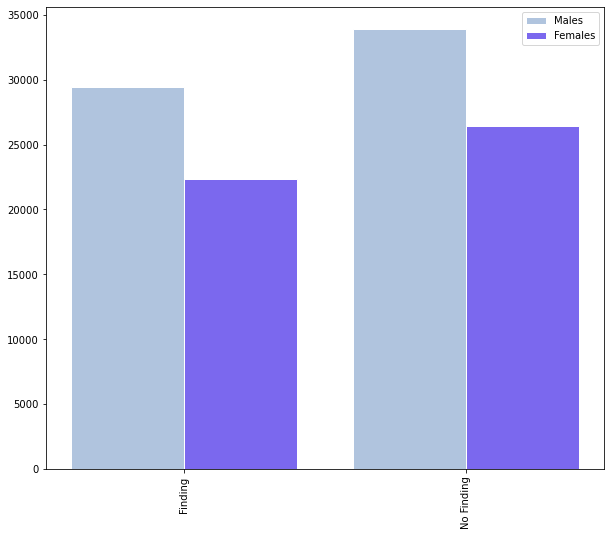

In [21]:
# We now want to showcase two caterogies, these being no findings and finding 
# We need to add all the types of illnesses as one type, Finding.

Male_Findings = []
Female_Findings = []

for row in df_male['Finding Labels']:
    if row == 'No Finding':
        Male_Findings.append('No Finding')
    else:
        Male_Findings.append('Finding')
        
for row in df_female['Finding Labels']:
    if row == 'No Finding':
        Female_Findings.append('No Finding')
    else:
        Female_Findings.append('Finding')
        
#ploting multiple bar graphs 

values3, counts3 = np.unique(Male_Findings , return_counts=True)
values4, counts4 = np.unique(Female_Findings, return_counts=True)


x_axis1 = np.arange(len(values3))
plt.bar(x_axis1 - 0.2, counts3, 0.4, label = 'Males', color = 'lightsteelblue', edgecolor='white')
plt.bar(x_axis1 + 0.2, counts4, 0.4, label = 'Females', color = 'mediumslateblue', edgecolor='white')
plt.xticks(x_axis1, values3)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()
        
  


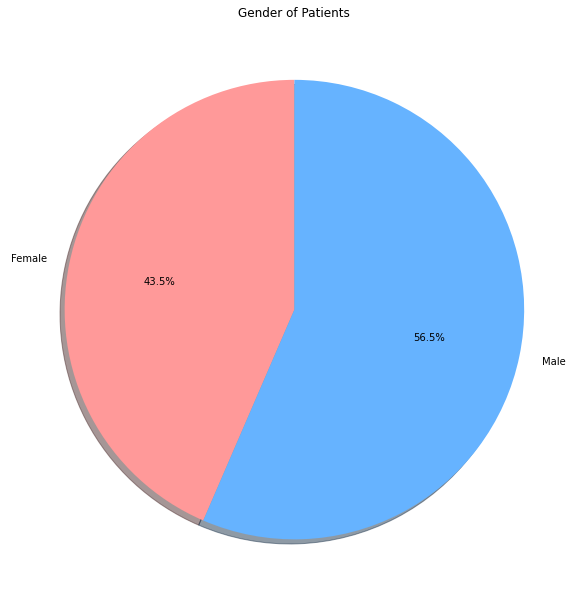

In [22]:
#create a piechart to showcase the number of males vs females in the datase

label = ['Female', 'Male']
color = ['#ff9999','#66b3ff']
plt.pie(df.groupby('Patient Gender').size(), labels = label,  autopct='%1.1f%%', shadow=True, startangle=90, colors = color)

plt.title('Gender of Patients')
plt.tight_layout()
plt.show()

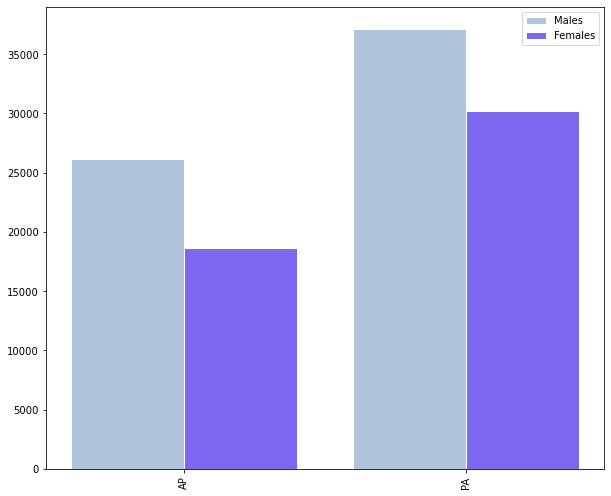

In [23]:
#plot barplot to showcase PA images Vs Ap images by gender type


values5, counts5 = np.unique(df_male['View Position'] , return_counts=True)
values6, counts6 = np.unique(df_female['View Position'], return_counts=True)


x_axis2 = np.arange(len(values5))
plt.bar(x_axis2 - 0.2, counts5, 0.4, label = 'Males', color = 'lightsteelblue', edgecolor='white')
plt.bar(x_axis2 + 0.2, counts6, 0.4, label = 'Females', color = 'mediumslateblue', edgecolor='white')
plt.xticks(x_axis2, values5)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()
        
  
